51
100
105
256


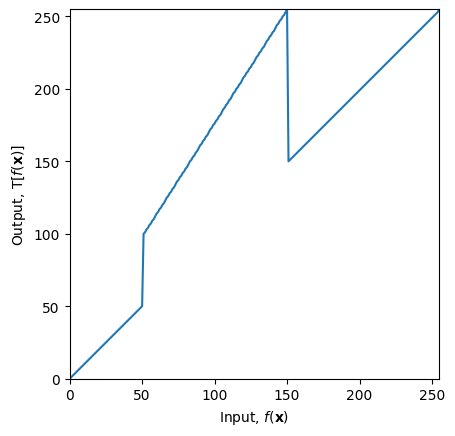

(810, 720)


In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50,50),(50,100),(150,255),(150,150)])

t1 = np.linspace(0, c[0,1], c[0,0]+1 - 0).astype('uint8')
print(len(t1))

t2 = np.linspace(c[1,1], c[2,1], c[2,0] - c[1,0]).astype('uint8')
print(len(t2))


t3 = np.linspace(c[3,1], 255, 255 - c[3,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform,t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread(r'C:\Users\nuwan\Downloads\emma.jpg', cv.IMREAD_GRAYSCALE)
print(img_orig.shape)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)

cv.destroyAllWindows()

101
50
105
256


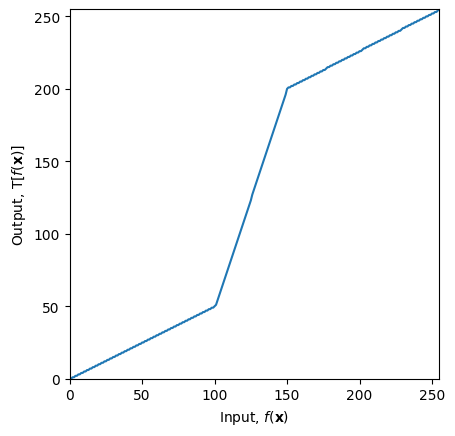

(217, 181)


In [2]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100,50),(150,200)])

t1 = np.linspace(0, c[0,1], c[0,0]+1 - 0).astype('uint8')
print(len(t1))

t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))

t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform,t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread(r'C:\Users\nuwan\Downloads\BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
print(img_orig.shape)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)

cv.destroyAllWindows()

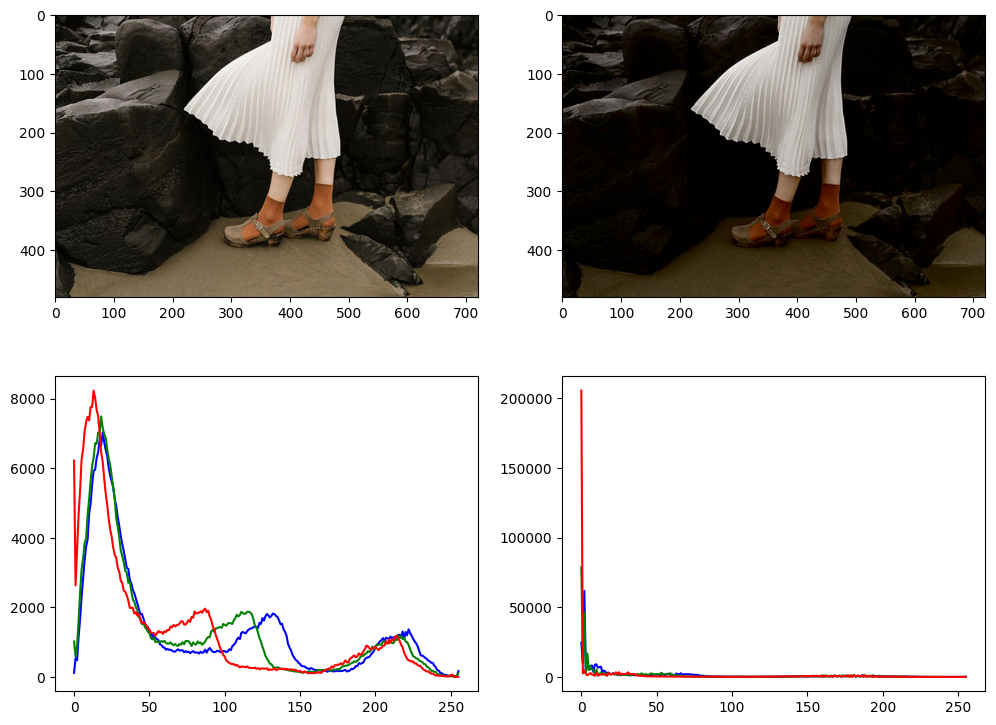

In [4]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread(r'C:\Users\nuwan\Downloads\highlights_and_shadows.jpg', cv.IMREAD_COLOR)

lab_img = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
L,a,b = cv.split(lab_img)
gamma = 2
table = np.array([(i/255.0)**gamma*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(L, table)
new_lab_img = cv.merge((img_gamma,a,b))
new_img = cv.cvtColor(new_lab_img, cv.COLOR_LAB2BGR)

img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(new_img, cv.COLOR_BGR2RGB)


fig, axarr = plt.subplots(2, 2, figsize=(12, 9))
axarr[0, 0].imshow(img_orig)
axarr[0, 1].imshow(img_gamma)
colors = ('b', 'g', 'r')
for i, c in enumerate(colors):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
    axarr[1, 0].plot(hist_orig, color=c)
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0, 256])
    axarr[1, 1].plot(hist_gamma, color=c)

plt.show()